# Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Reading the Dataset

In [2]:
df=pd.read_csv("C:\\UB\\ML 574\\Python\\DataSets\\wdbc.csv",header=None)

# Adding Headers to the Dataset


In [3]:
number_header=np.size(df,1)
headers=[]
for i in range(number_header):
    header_name=" " 
    header_name="header %s"%(i)
    headers.append(header_name)
df.columns=[headers]

# Preprocessing of the Data

# Dropping the ID column i.e the first column

In [4]:
df.drop('header 0',axis=1,inplace=True)

C:\Users\akash\Anaconda3\lib\site-packages\pandas\core\generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


# Replacing the Value of M with 1 and Value of B with 0

In [5]:
df=df.replace(to_replace="M",value=1)
df=df.replace(to_replace="B",value=0)

# Selecting X,Y for the Logistic Regression where Y is the Dependent Variable and X is the Set of Dependent Variables

In [6]:
x=df.drop(["header 1"],axis=1)
y=df["header 1"]

C:\Users\akash\Anaconda3\lib\site-packages\pandas\core\generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


# Selecting Training Set, Validation Set and Test Set

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x_validation,x_test,y_validation,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=2)

# Normalizing Training,Validation and Test Data

In [8]:
x_train_mean=np.mean(x_train,axis=0)
x_train_sd=np.std(x_train,axis=0)
x_train=(x_train-x_train_mean)/x_train_sd
print(x_train.head(1))

x_validation_mean=np.mean(x_validation,axis=0)
x_validation_sd=np.std(x_validation,axis=0)
x_validation=(x_validation-x_validation_mean)/x_validation_sd

x_test_mean=np.mean(x_test,axis=0)
x_test_sd=np.std(x_test,axis=0)
x_test=(x_test-x_test_mean)/x_test_sd

     header 2  header 3 header 4  header 5 header 6  header 7  header 8  \
560 -0.013303  1.775766 -0.01492 -0.144789  0.22879  0.175467 -0.544402   

     header 9 header 10 header 11    ...    header 22 header 23 header 24  \
560 -0.128256 -1.012054 -0.152706    ...      -0.1864  1.187213 -0.196141   

    header 25 header 26 header 27 header 28 header 29 header 30 header 31  
560 -0.291354 -0.332182 -0.171367  -0.65933  -0.13237 -1.080145 -0.035279  

[1 rows x 30 columns]


# Converting Dataset Values to a numpy Matrix

In [9]:
x_train=x_train.values
x_validation=x_validation.values
x_test=x_test.values
y_train=y_train.values;
y_validation=y_validation.values
y_test=y_test.values

# Defining the Sigmoid Function

In [10]:
def sigmoidFunction(z):
    return 1/(1+np.exp(-z))

# Defining the Hypothesis

In [11]:
def hypothesis(w,x,bias):
    wx=np.dot(x,w)+bias
    return sigmoidFunction(wx)

# Defining the Loss Function

In [12]:
def lossFunction(w,x,y,bias):
    m=x.shape[0]
    y_pred=hypothesis(w,x,bias)
    error = (y * np.log(y_pred)) + ((1-y)*np.log(1-y_pred))
    cost = (-1/m) * error
    return np.sum(cost)

# Defining the Gradient Descent Function

In [13]:
def gradDescent(w,x,y,bias,learningRate):
    m=x_train.shape[0]
    y_pred=hypothesis(w,x,bias)
    diff=y-y_pred
    dw0=(-1/m)*np.sum(diff)
    dw=(-1/m)*np.dot(x.transpose(),diff)
    bias=bias-learningRate*dw0
    w=w-learningRate*dw    
    return y_pred,bias,w

# Defining Function for Accuracy,Recall,Precision

In [14]:
def accuracy_calc(y,y_pred):
    c_matrix=confusion_matrix(y, np.round(y_pred))
    TP=c_matrix[0][0]
    FN=c_matrix[0][1]
    FP=c_matrix[1][0]
    TN=c_matrix[1][1]
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    return c_matrix,accuracy,precision,recall

# Defining the Function for Updating Values of Weight and Bias

In [15]:
def updateValues(w,x,y,bias,epochs,learning_rate):
    loss_graph=[]
    accuracy_graph=[]
    precision_graph=[]
    recall_graph=[]
    for i in range(epochs):
        loss=lossFunction(w,x,y,bias)
        loss_graph.append((loss))
        y_pred,bias,w=gradDescent(w,x,y,bias,learning_rate)
        accuracy_graph.append(accuracy_score(np.round(y_pred),y))
        precision_graph.append(precision_score(np.round(y_pred),y,average='binary'))
        recall_graph.append(recall_score(np.round(y_pred),y,average='binary'))
    return w,bias,loss_graph,accuracy_graph,precision_graph,recall_graph

# Initializing Parameters

In [16]:
epoch=1000
learning_rate=0.04
w_initial=np.zeros((x_train.shape[1],1))
bias_initial=0
loss_cost_graph=[]
loss_validation_graph=[]

In [17]:
##Plotting Loss Graph for Training and Validation Dataset with Epoch=1000,learning rate=0.05

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


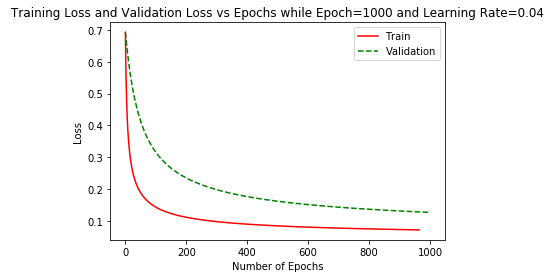

In [18]:
w_updated,bias_updated,loss_cost_graph,accuracy_graph,precision_graph,recall_graph=updateValues(w_initial,x_train,y_train,bias_initial,epoch,learning_rate)
plt.plot(loss_cost_graph,label= "Train",color="red")
w,bias,loss_validation_graph,accuracy_graph,precision_graph,recall_graph=updateValues(w_initial,x_validation,y_validation,bias_initial,epoch,learning_rate)
plt.title(" Training Loss and Validation Loss vs Epochs while Epoch=1000 and Learning Rate=0.04 ")
plt.plot(loss_validation_graph,color="green",linestyle="dashed", label="Validation")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

In [19]:
##Tuning Hyper Parameters (increasing learning rate and number of epochs)
learningRateV1=0.045
learningRateV2=0.05
epochV1=1500
epochV2=2000

In [20]:
##Plotting Loss Graph for Training and Validation Dataset with Epoch=2000,learning rate=0.002

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


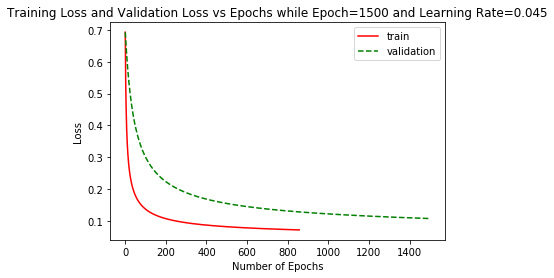

In [21]:
w_updated,bias_updated,loss_cost_graph,accuracy_graph,precision_graph,recall_graph=updateValues(w_initial,x_train,y_train,bias_initial,epochV1,learningRateV1)
plt.plot(loss_cost_graph,label="train",color="red")
w,bias,loss_validation_graph,accuracy_graph,precision_graph,recall_graph=updateValues(w_initial,x_validation,y_validation,bias_initial,epochV1,learningRateV1)
plt.title("Training Loss and Validation Loss vs Epochs while Epoch=1500 and Learning Rate=0.045")
plt.plot(loss_validation_graph,label="validation",color="green",linestyle="dashed")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


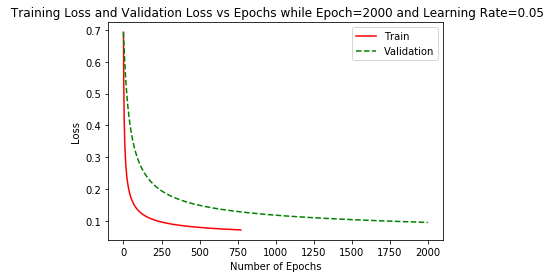

In [22]:
w_updated,bias_updated,loss_cost_graph,accuracy_graph,precision_graph,recall_graph=updateValues(w_initial,x_train,y_train,bias_initial,epochV2,learningRateV2)
plt.plot(loss_cost_graph,color="red",label="Train")
w,bias,loss_validation_graph,accuracy_graph,precision_graph,recall_graph=updateValues(w_initial,x_validation,y_validation,bias_initial,epochV2,learningRateV2)
plt.title(" Training Loss and Validation Loss vs Epochs while Epoch=2000 and Learning Rate=0.05")
plt.plot(loss_validation_graph,color="green",linestyle="dashed",label="Validation")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

# Accuracy vs Epoch Graph for Validation Data Sets 

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


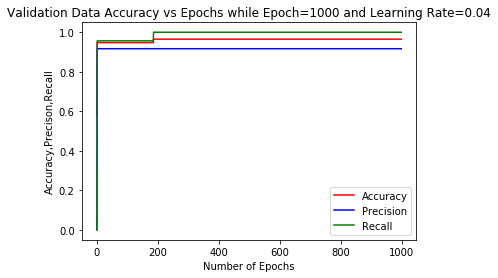

In [23]:
w,bias,loss_validation_graph,accuracy_graph,precision_graph,recall_graph=updateValues(w_initial,x_validation,y_validation,bias_initial,epoch,learning_rate)
plt.title("Validation Data Accuracy vs Epochs while Epoch=1000 and Learning Rate=0.04")
plt.plot(accuracy_graph,color="red",label="Accuracy")
plt.plot(precision_graph,color="blue",label="Precision")
plt.plot(recall_graph,color="green",label="Recall")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy,Precison,Recall")
plt.legend()

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


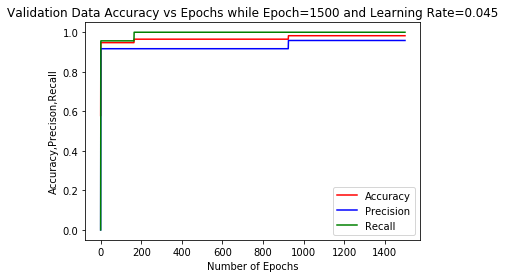

In [24]:
w,bias,loss_validation_graph,accuracy_graph,precision_graph,recall_graph=updateValues(w_initial,x_validation,y_validation,bias_initial,epochV1,learningRateV1)
plt.title("Validation Data Accuracy vs Epochs while Epoch=1500 and Learning Rate=0.045")
plt.plot(accuracy_graph,color="red",label="Accuracy")
plt.plot(precision_graph,color="blue",label="Precision")
plt.plot(recall_graph,color="green",label="Recall")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy,Precison,Recall")
plt.legend()

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


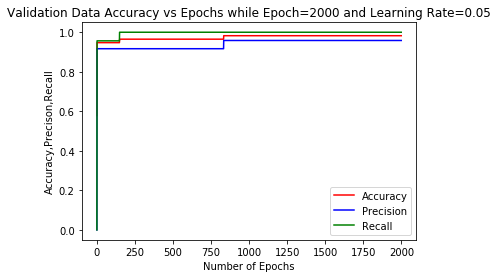

In [25]:
w,bias,loss_validation_graph,accuracy_graph,precision_graph,recall_graph=updateValues(w_initial,x_validation,y_validation,bias_initial,epochV2,learningRateV2)
plt.title("Validation Data Accuracy vs Epochs while Epoch=2000 and Learning Rate=0.05")
plt.plot(accuracy_graph,color="red",label="Accuracy")
plt.plot(precision_graph,color="blue",label="Precision")
plt.plot(recall_graph,color="green",label="Recall")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy,Precison,Recall")
plt.legend()

# Using Optimum W and B to predict the Test Datasets

In [26]:
y_test_pred=hypothesis(w_updated,x_test,bias_updated)
c_matrix,accuracy,precision,recall=accuracy_calc(y_test,y_test_pred)
print(c_matrix,accuracy,precision,recall)

[[36  0]
 [ 1 20]] 0.9824561403508771 0.972972972972973 1.0
